# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
X = boston.data
y = boston.target

# 3. Train test split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

# 4. Simple Linear Model

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
lr= LinearRegression()
lr.fit(xtrain ,ytrain)

LinearRegression()

In [16]:
lr.score(xtrain ,ytrain)

0.740839101697453

In [17]:
lr.score(xtest ,ytest)

0.7315285073206941

# 5. Ridge Regularization for Linear Model

In [70]:
from sklearn.linear_model import Ridge
modelr= Ridge(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain, ytrain)


0.7153876187378269

In [71]:
modelr.score(xtest, ytest)

0.7000179991037276

# 6. Lasso Regularization for Linear Model

In [69]:
from sklearn.linear_model import Lasso
modelr= Lasso(alpha=1)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain, ytrain)

0.6854462767527718

In [64]:
modelr.score(xtest, ytest)

0.8342789250083167

# 7. Polynomial Regression of degree 2

In [52]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly=pf.fit_transform(xtrain)
xtest_poly=pf.fit_transform(xtest)




In [56]:
lrp=LinearRegression()
lrp.fit(xtrain_poly, ytrain)

lrp.score(xtrain_poly,ytrain)

0.8587471076144799

In [57]:
lrp.score(xtest_poly,ytest)

0.6425387473450137

# 8. Ridge Regularization for Polynomial model

In [72]:
from sklearn.linear_model import Ridge
modelrp= Ridge(alpha=100)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly, ytrain)

0.921225209583872

In [73]:
modelrp.score(xtest_poly, ytest)

0.802873168510991

# 9. Lasso Regularization for Polynomial model

In [74]:
from sklearn.linear_model import Lasso
modelrp= Lasso(alpha=1)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.901e+03, tolerance: 2.998e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8931287449955692

In [75]:
modelrp.score(xtest_poly, ytest)

0.8059464739627571

# 10. Select K Best

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb= SelectKBest(score_func=f_regression, k=7)
x_selected=kb.fit_transform(xtrain, ytrain)
x_selected.shape

(354, 7)

In [86]:
lrk=LinearRegression()
lrk.fit(x_selected,ytrain)
lrk.score(x_selected , ytrain)

0.6809826858795538

In [89]:
lrpk=LinearRegression()
lrpk.fit(x_selected,xtrain_poly)
lrpk.score(x_selected , xtrain_poly)

0.6646627247052119

In [113]:
traindf=pd.DataFrame(data=xtrain, columns =boston.feature_names)
tdf=pd.DataFrame(data=xtest,columns= boston.feature_names)
traindf['target']= ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  8.26725   0.0  18.10   1.0  0.668  5.875  89.6  1.1296  24.0  666.0   
1  2.92400   0.0  19.58   0.0  0.605  6.101  93.0  2.2834   5.0  403.0   
2  0.01501  90.0   1.21   1.0  0.401  7.923  24.8  5.8850   1.0  198.0   
3  0.06162   0.0   4.39   0.0  0.442  5.898  52.3  8.0136   3.0  352.0   
4  0.35114   0.0   7.38   0.0  0.493  6.041  49.9  4.7211   5.0  287.0   

   PTRATIO       B  LSTAT  target  
0     20.2  347.88   8.88    50.0  
1     14.7  240.16   9.81    25.0  
2     13.6  395.52   3.16    50.0  
3     18.8  364.61  12.67    17.2  
4     19.6  396.90   7.70    20.4

In [101]:
corr = traindf.corr()

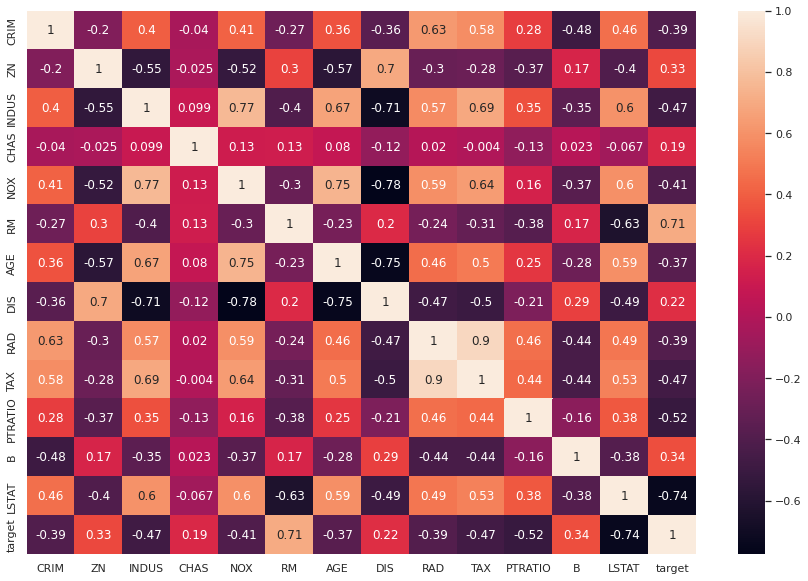

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [108]:
selected_columns=['LSTAT','NOX','PTRATIO','INDUS','CRIM','TAX','RM']


In [115]:
train_selected= traindf[selected_columns]
test_selected= tdf[selected_columns]
test_selected.head()


LSTAT    NOX  PTRATIO  INDUS      CRIM    TAX     RM
0  19.77  0.693     20.2  18.10  24.80170  666.0  5.349
1  18.71  0.713     20.2  18.10   9.51363  666.0  6.728
2  11.66  0.614     20.2  18.10   4.64689  666.0  6.980
3  17.27  0.489     18.6  10.59   0.17446  277.0  5.960
4  13.83  0.538     21.0   8.14   0.85204  307.0  5.965

In [120]:
kmodel= LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)
kmodel.score(test_selected, ytest)


0.6795336794569655

In [118]:
selectdf=pd.DataFrame(x_selected, columns=['A','B','C','D','E','F','G'])
selectdf.head()

A      B      C      D      E     F      G
0  8.26725  18.10  0.668  5.875  666.0  20.2   8.88
1  2.92400  19.58  0.605  6.101  403.0  14.7   9.81
2  0.01501   1.21  0.401  7.923  198.0  13.6   3.16
3  0.06162   4.39  0.442  5.898  352.0  18.8  12.67
4  0.35114   7.38  0.493  6.041  287.0  19.6   7.70

In [119]:
df=pd.concat([traindf,selectdf],axis=1)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  ...  \
0  8.26725   0.0  18.10   1.0  0.668  5.875  89.6  1.1296  24.0  666.0  ...   
1  2.92400   0.0  19.58   0.0  0.605  6.101  93.0  2.2834   5.0  403.0  ...   
2  0.01501  90.0   1.21   1.0  0.401  7.923  24.8  5.8850   1.0  198.0  ...   
3  0.06162   0.0   4.39   0.0  0.442  5.898  52.3  8.0136   3.0  352.0  ...   
4  0.35114   0.0   7.38   0.0  0.493  6.041  49.9  4.7211   5.0  287.0  ...   

        B  LSTAT  target        A      B      C      D      E     F      G  
0  347.88   8.88    50.0  8.26725  18.10  0.668  5.875  666.0  20.2   8.88  
1  240.16   9.81    25.0  2.92400  19.58  0.605  6.101  403.0  14.7   9.81  
2  395.52   3.16    50.0  0.01501   1.21  0.401  7.923  198.0  13.6   3.16  
3  364.61  12.67    17.2  0.06162   4.39  0.442  5.898  352.0  18.8  12.67  
4  396.90   7.70    20.4  0.35114   7.38  0.493  6.041  287.0  19.6   7.70  

[5 rows x 21 columns]

# 11. Conclusion

In [ ]:
#In order to reduce the overfitting porblem we use regularization. in regularized regression we have to types ridge abd Lasso.from two of them lasso is better because it automatically do the feature selection.
#so we tried to compare lasso and manually selecting the features and we found out that Lasso gives the better result(more accurate).
